## Before Lecture

- final exam time
- First day Nov 3rd 9am-10am?

# House Keeping

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import dirichlet, gamma, uniform, norm
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import patsy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE

from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D  

# Reading

1. Textbook Page 201-230


# Clustering

- A corpus of documents into topics
- segment shoppers by preferences or price elasticity (price discrimination)
- Group voters according to their features. See [Cambridge Analytica](https://www.youtube.com/watch?v=iX8GxLP1FHo)
- Online recommendation system
- Roy Morgan's personas

**Mixture distribution** (7.1)
$$p(x) = \pi_1p_1(x) + ...+\pi_K p_K(x)$$
- $\pi_i$ is the probability (weight) of being in group $i$.
- $p_i()$ is the probability law in group $i$.

This topic is VERY useful in Bayesian nonparametric modelling (also a topic in ML). But we have limited time, and such methods are quite difficult and beyond the scope of this subject. We will only scratch the surface here.


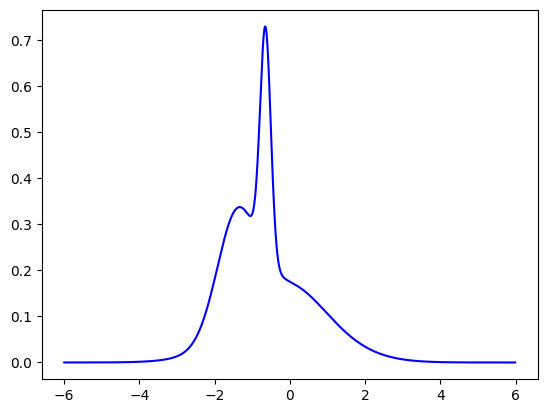

In [5]:
np.random.seed(1981)
x = np.arange(-6, 6, 0.01)
K = 5
weight = dirichlet.rvs([1] * K, size=1)
sigma = gamma.rvs(1, size=K)
mu = uniform.rvs(-2, 2, size=K)
pdf = np.zeros((len(x), K))

for kk in range(K):
    pdf[:, kk] = norm.pdf(x, loc=mu[kk], scale=sigma[kk])

y = np.dot(pdf, weight.T)
plt.plot(x, y, '-b')
plt.show()

## K-mean normal mixture

The previous example is 1-dimensional. A more general model is multivariate
$$p_k(x)=N(x\mid \mu_k, \Sigma_k),$$
where $N()$ is the **multivariate normal** distribution. $\Sigma_k$ is the covariance matrix in group $k$. If each element of $x$ is independent of the others, then covariance has a diagonal structure as (7.4) as $\Sigma_k=\sigma^2_k I_N$. Read the textbook for more details.

## K-Means (Algorithm 17)

The K-mean method does not care about the underlying distribution.
The data is $\{x_i\}_{i=1}^n$

1 Initialisation. Membership $k_i$.

2 Estimate the means
$$\hat{\mu}_k=\frac{1}{n_k}\sum\limits_{i:k_i=k}x_i,$$
where $n_k$ is the number of observations in group $k$.

3 Update the membership $k_i$.

$$k_i=\arg\min_k \sum\limits_{j}(x_{ij}-\hat{\mu}_{kj})^2 $$
Simply, find the closest component.


Obviously, scaling matters here.

## Protein data

In [6]:
# The protein data
#food <- read.csv("protein.csv", row.names=1)
food = pd.read_csv("https://www.dropbox.com/s/ly5562fqz0ky8dd/protein.csv?dl=1", index_col=0)
food.columns = food.columns.str.strip()

In [7]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Albania to Yugoslavia
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RedMeat    25 non-null     float64
 1   WhiteMeat  25 non-null     float64
 2   Eggs       25 non-null     float64
 3   Milk       25 non-null     float64
 4   Fish       25 non-null     float64
 5   Cereals    25 non-null     float64
 6   Starch     25 non-null     float64
 7   Nuts       25 non-null     float64
 8   Fr&Veg     25 non-null     float64
dtypes: float64(9)
memory usage: 2.0+ KB


In [8]:
food.columns

Index(['RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals', 'Starch',
       'Nuts', 'Fr&Veg'],
      dtype='object')

In [9]:
food

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


Scale the data.

In [10]:
scaler = StandardScaler() #normalise rows
food_scaled = scaler.fit_transform(food)
food_scaled = pd.DataFrame(food_scaled, columns=food.columns, index = food.index)

In [11]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(food_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [12]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0,
       1, 0, 1], dtype=int32)

In [13]:
kmeans.n_clusters

3

In [14]:
food_scaled.columns

Index(['RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals', 'Starch',
       'Nuts', 'Fr&Veg'],
      dtype='object')

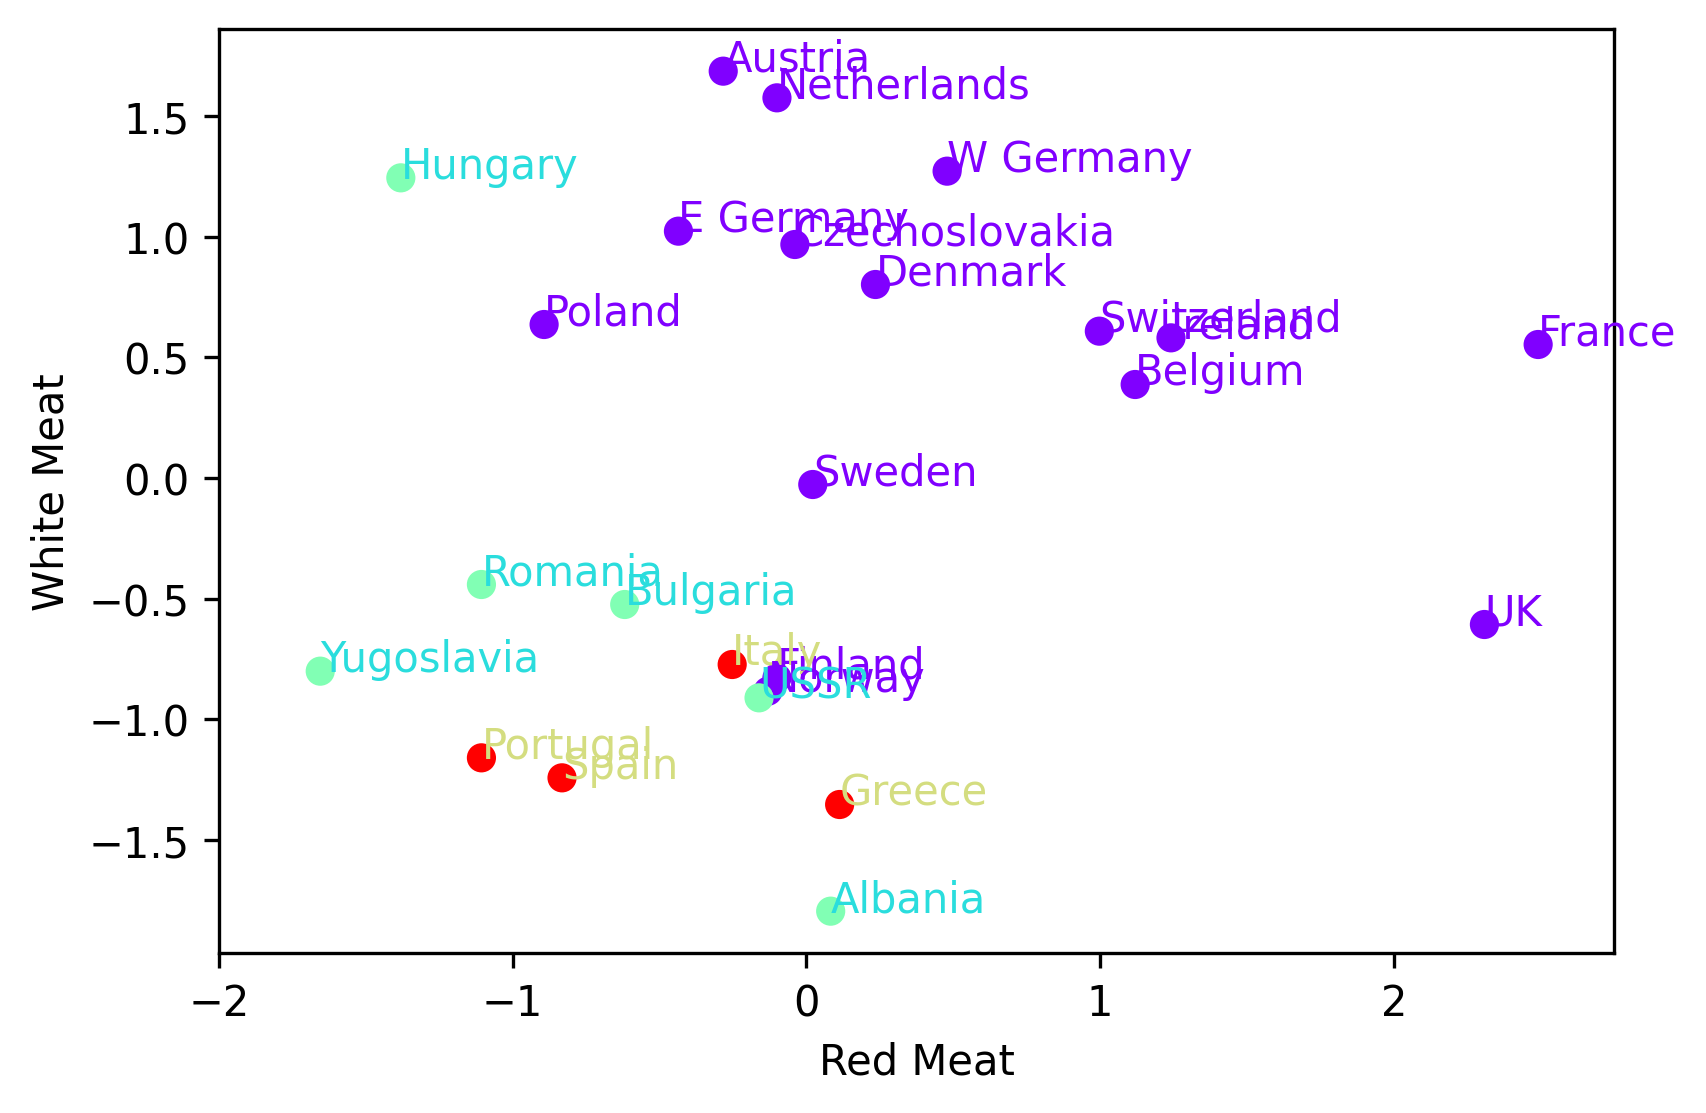

In [15]:
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(food_scaled["RedMeat"], food_scaled["WhiteMeat"], c=kmeans.labels_, cmap='rainbow')
plt.xlim(-2, 2.75)
plt.xlabel("Red Meat")
plt.ylabel("White Meat")

for i, label in enumerate(kmeans.labels_):
    plt.text(food_scaled["RedMeat"].iloc[i], food_scaled["WhiteMeat"].iloc[i], food_scaled.index[i], color=plt.cm.rainbow(label / kmeans.n_clusters))

plt.show()

$\color{red}{Question:}$ draw a scatter plot of Fish and Milk.

## t-SNE

t-distributed stochastic neighbor embedding
- visualize high-dimensional datasets in two or three dimensions
- P163-168 （Raschka, Liu and Mirjalili 2022)

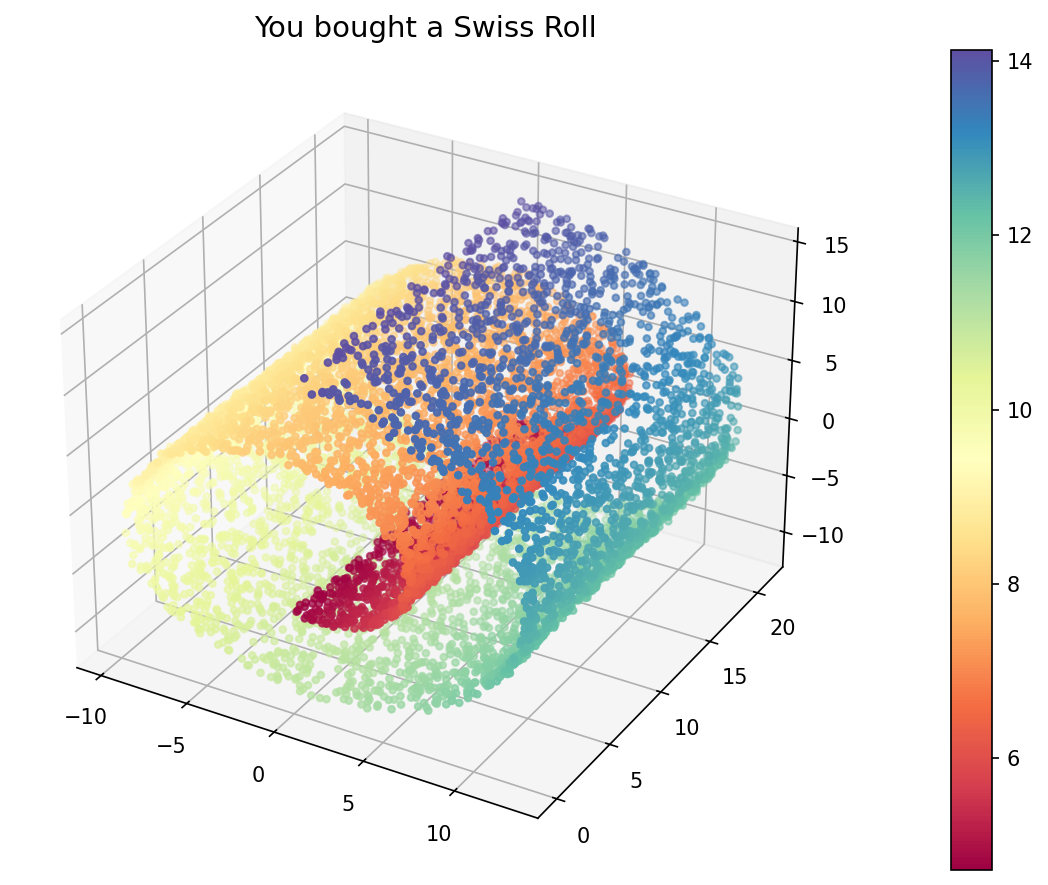

In [16]:
# DGP
X, color = make_swiss_roll(n_samples=10000, noise=0.1, random_state=42)

# plot
fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(111, projection='3d')
 
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='Spectral', s=10)
colbar = plt.colorbar(sc, ax=ax, pad=0.1)

ax.set_title("You bought a Swiss Roll", fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
# tSNE reduce dimension
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_embedded = tsne.fit_transform(X)


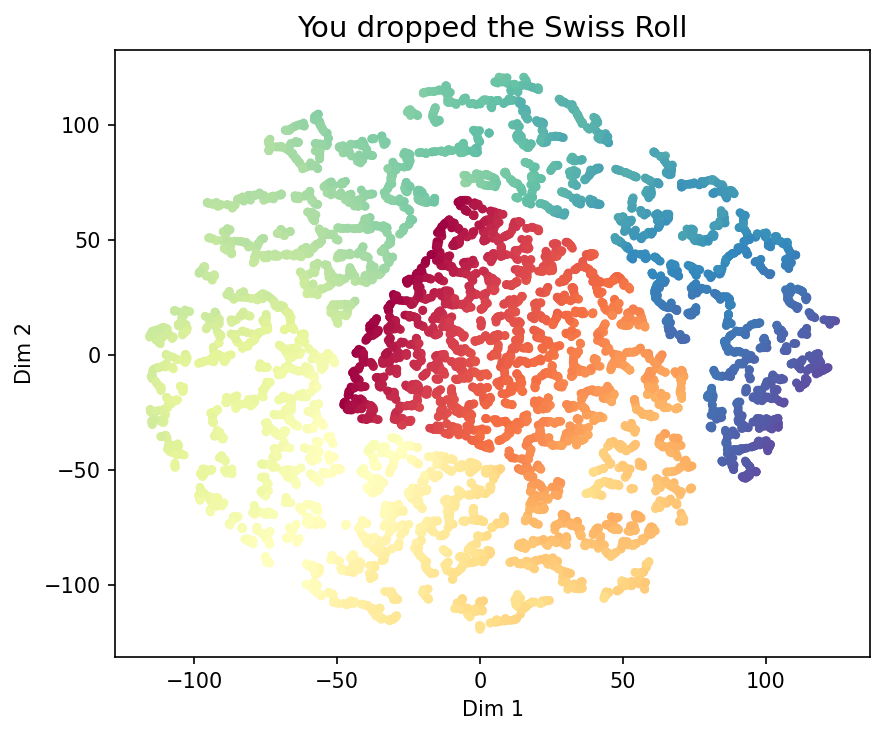

In [18]:
# visualize
plt.figure(figsize=(6, 5), dpi=150)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap='Spectral', s=10)
plt.title("You dropped the Swiss Roll", fontsize=14)
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.tight_layout()
plt.show()

In [19]:
# now back to the food example
food_scaled

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947
Denmark,0.235405,0.802333,0.697694,1.133031,1.684570,-0.962332,0.327281,-1.219184,-0.982202
E Germany,-0.435438,1.023361,0.697694,-0.863563,0.334754,-0.711240,1.389071,-1.167785,-0.303261
Finland,-0.100017,-0.827751,-0.215518,2.382698,0.454738,-0.553145,0.514656,-1.064987,-1.547987
France,2.491879,0.553676,0.332409,0.343012,0.424742,-0.385751,0.327281,-0.345401,1.337515


In [20]:
tsne = TSNE(n_components=2, init='pca', perplexity=5, random_state=123)
X_tsne = tsne.fit_transform(food_scaled)
X_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'], index=food.index)
X_tsne

,Dim1,Dim2
Country,,
Albania,-51.461578,-104.181366
Austria,20.816914,16.378159
Belgium,-0.732822,52.243694
Bulgaria,-36.259148,-91.212860
Czechoslovakia,-9.466770,-6.347369
Denmark,-7.875753,122.921440
E Germany,-12.002517,9.837045
Finland,7.876599,151.236099
France,18.547737,66.983177


In [22]:
fig = px.scatter(
    X_tsne,
    x='Dim1',
    y='Dim2',
    text=X_tsne.index,
    color=kmeans.labels_.astype(str),
    title='t-SNE of Protein Consumption Data',
    width=800,
    height=600
)

fig.update_traces(textposition='top center') 
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## LOOCV

Very expensive, supposed to be the best.

In [ ]:
k_values = range(1, 12)  # Testbook uses up to 7 clusters

mse_values = []
# Use Leave-One-Out cross-validation
loo = LeaveOneOut()

for k in k_values:
    total_mse = 0

    for train_index, test_index in loo.split(food_scaled):
        x_train, x_test = food_scaled.iloc[train_index], food_scaled.iloc[test_index]
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=0)
        kmeans.fit(x_train)
        labels = kmeans.predict(x_test)
        center = kmeans.cluster_centers_[labels[0]]
        mse = np.sum((x_test.values-center)**2)
        total_mse += mse

    mean_mse = total_mse / len(food_scaled)
    mse_values.append(mean_mse)

## ELBOW

In [23]:
# Plot the elbow curve
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(k_values, mse_values, marker='o', label='Mean Squared Error (MSE)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Elbow Method for Optimal k (Leave-One-Out CV)')
plt.show()

NameError: name 'k_values' is not defined

<Figure size 2400x1800 with 0 Axes>

# Principal Component

(7.6)
$$E[x_i]=\varphi_1 \nu_{i1}+...+\varphi_K \nu_{iK}$$
- $x_i$ and $\varphi_k$ ($k=1,...,K$) are length-p vactors.
- $\nu_{ik}$ ($k=1,...,K$) are scalars.

If $K << p$, the model is parsimonious.

(7.6) expands to (7.7)
$$E[x_{ij}]=\varphi_{j1}\nu_{i1}+...+\varphi_{jK} \nu_{iK}$$
for $j=1,...,p$.
- $\nu_{ik}$ are the property of $x_i$. (they are indexed by $i$)
- $\varphi_{jk}$ are coefficients. (they apply to other $x$)


## Illustration

We do not cover details, which belong to linear algebra. For illustration

<img src="https://www.dropbox.com/s/kkl3gepbhffpj6o/PCA.png?dl=1">

- Figure 7.8
- $φ$ is the slope.
- $\nu$ is the coordinates of all $x$ on the line.


<img src="https://www.dropbox.com/s/qgsdinl00dh9jn9/PCA2.png?dl=1">

- For 2-dimensional data, two PCs are enough.
- Which one is more important?

## Algorithm 18 (PCA)

[Page 213] Set $\tilde{X}^1=X$, which is $n\times p$ (think design matrix). For $k=1,...,\min(n,p)$,

- Find
$$\varphi_k=\arg\max_{\varphi_k} \left[var(\tilde{X}^k \varphi_k)=var\{\nu_{k1},...\nu_{kn}\}\right], $$
where $\nu_{ki}=\varphi_k'x_i$ and $\sum\limits_{j=1}^p\varphi_{kj}^2=1$.
- Update rows of $\tilde{X}^k$ via
$$\tilde{x}^{k+1}_i = \tilde{x}^k_i-\nu_{ki}\varphi_k.$$

## Subscripts
The textbook has slight notation inconsistency. This seems unfortunate, but welcome to the real world. In the context of PCA here,
- $k$ means components with $k=1,...,K$
- $i$ means observation with $i=1,...,n$
- $j$ indicates variable (elements in $x$) with $j=1,...,p$

This is probably why we prefer matrix representation, which has less notations.

# Protein

- A compoent is a $φ$.
- Each $\varphi_k$ can be viewed as a **dietary pattern**.
- The first pattern `PC1` distinguishes countries the best.


In [24]:
food = pd.read_csv("https://www.dropbox.com/s/ly5562fqz0ky8dd/protein.csv?dl=1", index_col=0)
food.columns = food.columns.str.strip()

In [25]:
food

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


In [26]:
scaler = StandardScaler()
food_scaled = scaler.fit_transform(food)

In [27]:
pca = PCA(n_components=2)
pcfood = pca.fit(food_scaled)

# Get the rotation matrix (PCs)
rounded_rotation_matrix = pd.DataFrame(pcfood.components_).round(1)

print(rounded_rotation_matrix)

     0    1    2    3    4    5    6    7    8
0 -0.3 -0.3 -0.4 -0.4 -0.1  0.4 -0.3  0.4  0.1
1 -0.1 -0.2 -0.0 -0.2  0.6 -0.2  0.4  0.1  0.5


In [28]:
pca = PCA()
pcfood = pca.fit(food_scaled)

# Get the rotation matrix (PCs)
rounded_rotation_matrix = pd.DataFrame(pcfood.components_).round(1)

print(rounded_rotation_matrix)

     0    1    2    3    4    5    6    7    8
0 -0.3 -0.3 -0.4 -0.4 -0.1  0.4 -0.3  0.4  0.1
1 -0.1 -0.2 -0.0 -0.2  0.6 -0.2  0.4  0.1  0.5
2 -0.3  0.6  0.2 -0.4 -0.3  0.1  0.2 -0.1  0.4
3  0.6 -0.0  0.3 -0.0 -0.2 -0.0 -0.3  0.3  0.5
4  0.3 -0.3  0.1 -0.2 -0.3  0.2  0.7  0.2 -0.2
5 -0.5 -0.1  0.4  0.6 -0.1  0.1  0.1  0.4  0.1
6  0.2 -0.0 -0.4  0.5 -0.1  0.4  0.2 -0.4  0.4
7  0.0  0.0  0.5 -0.1  0.4  0.7 -0.1 -0.2 -0.1
8  0.2  0.6 -0.3  0.2  0.3  0.2  0.1  0.5 -0.2


In [29]:
food_pc = pd.DataFrame(pcfood.components_);
food_pc.columns = food.columns
food_pc

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,-0.302609,-0.310556,-0.426679,-0.377727,-0.135650,0.437743,-0.297248,0.420334,0.110420
1,-0.056252,-0.236853,-0.035336,-0.184589,0.646820,-0.233485,0.352826,0.143311,0.536190
2,-0.297580,0.623897,0.181528,-0.385658,-0.321274,0.095918,0.242975,-0.054388,0.407556
3,0.646477,-0.036992,0.313164,-0.003318,-0.215955,-0.006204,-0.336685,0.330288,0.462056
4,0.322160,-0.300165,0.079110,-0.200414,-0.290031,0.238168,0.735973,0.150537,-0.233517
5,-0.459870,-0.121007,0.361249,0.618438,-0.136791,0.080758,0.147667,0.447010,0.118550
6,0.150334,-0.019664,-0.443272,0.462095,-0.106394,0.404964,0.152753,-0.407262,0.449978
7,0.019858,0.027876,0.491200,-0.081422,0.448732,0.702995,-0.114540,-0.183800,-0.091963
8,0.246000,0.592397,-0.333386,0.178084,0.312826,0.152260,0.121858,0.518275,-0.202950



## Interpretation is an Art
We can do a **bottoms-up** investigation to make sense of the factors. It looks like PC1 is an 'average diet'; PC2 is Iberian.

- Which awards the score $\nu_k$ for individual $i$?
- This also calls for field knowledge.
- The sign does not matter in a PC; the magnitude is.

In [30]:
food_pc.loc[[0,1], :]

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,-0.302609,-0.310556,-0.426679,-0.377727,-0.13565,0.437743,-0.297248,0.420334,0.11042
1,-0.056252,-0.236853,-0.035336,-0.184589,0.64682,-0.233485,0.352826,0.143311,0.53619


For **top-down** intepretation, check the values of $\nu_{ik}$.

In [31]:
np.round(pcfood.transform(food_scaled[18,:].reshape(1, -1)), 2)

array([[ 1.34,  2.61,  0.53,  0.37,  0.53,  0.68, -0.61, -0.24, -0.49]])

In [32]:
np.round(pcfood.components_ @ food_scaled[18,:], 2)

array([ 1.34,  2.61,  0.53,  0.37,  0.53,  0.68, -0.61, -0.24, -0.49])

In [33]:
np.round(pcfood.components_[0:2] @ food_scaled[18,:], 2)

array([1.34, 2.61])

$\color{red}{Question:}$ which country is it?

In [34]:
food.index[18]

'Spain'

In [35]:
food_v = pd.DataFrame(pcfood.transform(food_scaled))
food_v.index = food.index
food_v

,0,1,2,3,4,5,6,7,8
Country,,,,,,,,,
Albania,3.557238,-1.664102,-1.797551,0.234394,0.023733,-1.055592,-0.481470,-0.777255,-0.105382
Austria,-1.452006,-1.062702,1.365390,0.171564,-0.952695,0.222932,-0.184890,0.256178,-0.221930
Belgium,-1.655480,0.162784,0.221000,0.531464,0.770661,-0.295781,-0.199630,0.207504,-0.033855
Bulgaria,3.198708,-1.327895,0.154409,0.218606,-0.494741,-0.709921,0.474367,0.824911,-0.306046
Czechoslovakia,-0.378104,-0.615096,1.220603,-0.473550,0.262120,-0.840063,0.321443,-0.012552,-0.152530
Denmark,-2.414042,0.291332,-0.767776,-0.987288,-0.767949,-0.173842,-0.230472,0.633827,0.490183
E Germany,-1.451538,0.459586,1.329399,-1.159386,0.431664,-0.661681,-0.566223,0.166542,-0.265261
Finland,-1.596104,-0.608293,-2.091770,-1.444493,0.037970,0.851402,0.741206,-0.230576,-0.135834
France,-1.518666,0.801560,0.001921,1.997822,0.255623,-0.917485,0.965992,0.022678,0.554817


In [36]:
kmeans = KMeans(n_clusters=7, n_init=10, random_state=0)
kmeans.fit(food_scaled)

,n_clusters,7
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


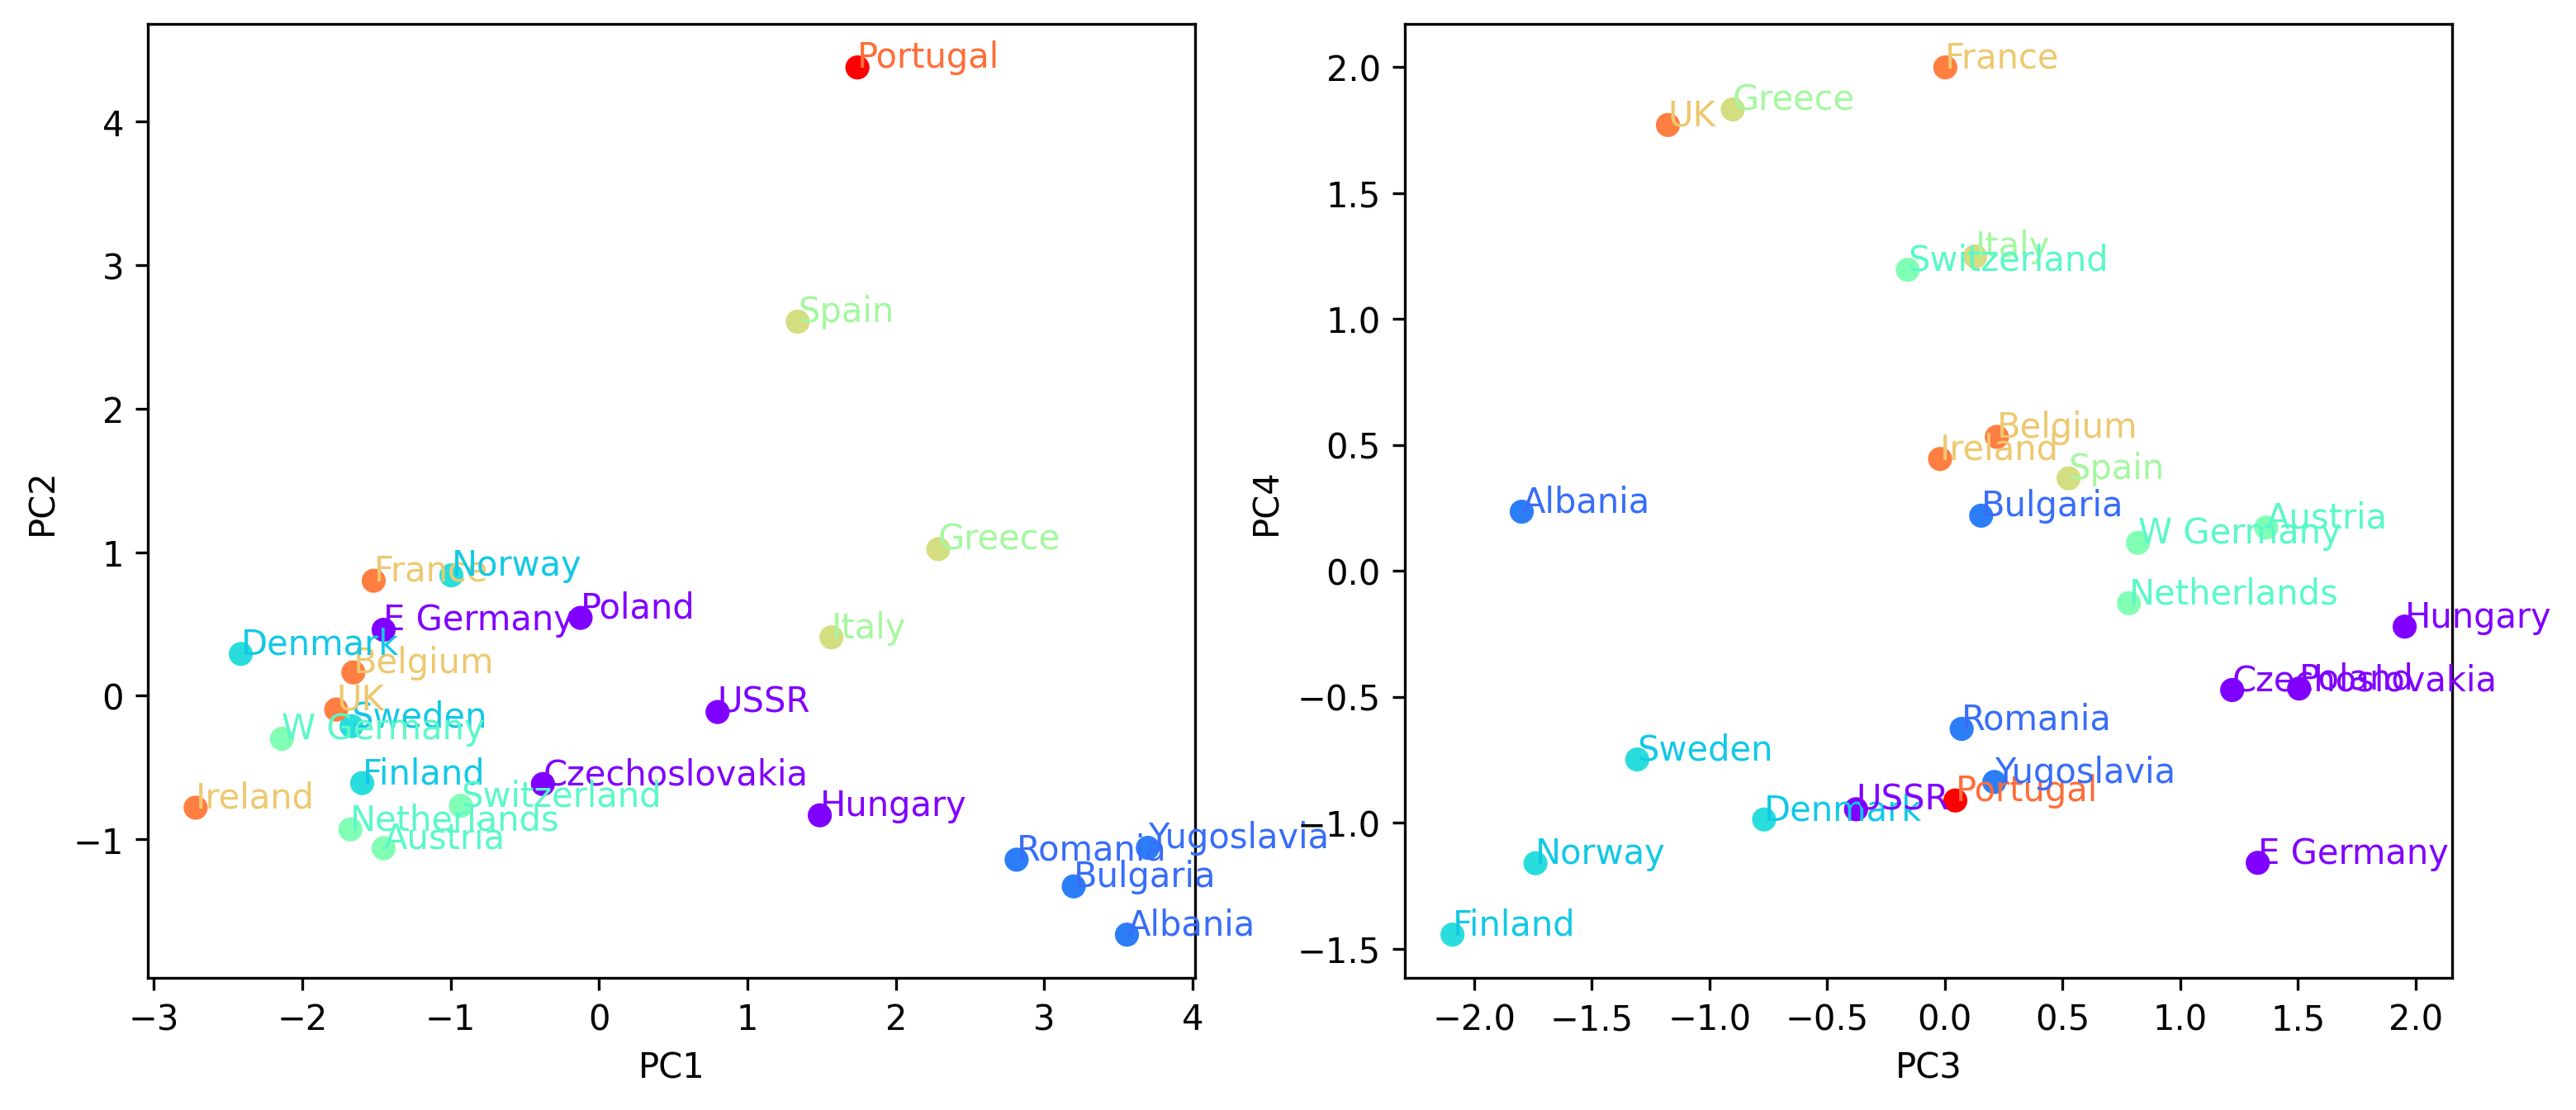

In [37]:
plt.figure(figsize=(12, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.scatter(food_v[0], food_v[1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")

for i, label in enumerate(food_v.index):
    plt.text(food_v[0].iloc[i], food_v[1].iloc[i], label, color=plt.cm.rainbow(kmeans.labels_[i] / kmeans.n_clusters))

plt.subplot(1, 2, 2)
plt.scatter(food_v[2], food_v[3], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("PC3")
plt.ylabel("PC4")

for i, label in enumerate(food_v.index):
    plt.text(food_v[2].iloc[i], food_v[3].iloc[i], label, color=plt.cm.rainbow(kmeans.labels_[i] / kmeans.n_clusters))

plt.show()

## Exercise

Repeat the previous exercise with minor revision. Apply K-Mean (K=3) method to the feature matrix 

- You probably need to know what the feature matrix is. Is it `food_v`, `food_pc`, `pcfood`, `food` or `food_scaled`?
- Visually check by a scatter plot as in the above application. Namely, plot pairs of PCs with color implied by the Kmean cluster.
- Explain PC's relationship to the clusters.
- Link the cluster to the previous t-SNE results and comment.

**Anyone can code now. Your interpretation is the most important!**

Cluster sizes (K=3):
cluster3
0    15
1     4
2     6
Name: count, dtype: int64

Cluster means in PC space (first 4 PCs):
           PC1   PC2   PC3   PC4
cluster3                        
0        -1.50 -0.15 -0.00 -0.02
1         1.73  2.10 -0.05  0.63
2         2.59 -1.02  0.04 -0.36

Cluster profiles (mean z-scores by food type):


,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster3,,,,,,,,,
0,0.46,0.52,0.59,0.60,0.12,-0.62,0.36,-0.72,-0.22
1,-0.52,-1.13,-0.42,-0.85,1.00,0.13,-0.19,1.34,1.66
2,-0.81,-0.54,-1.19,-0.92,-0.97,1.47,-0.78,0.91,-0.55


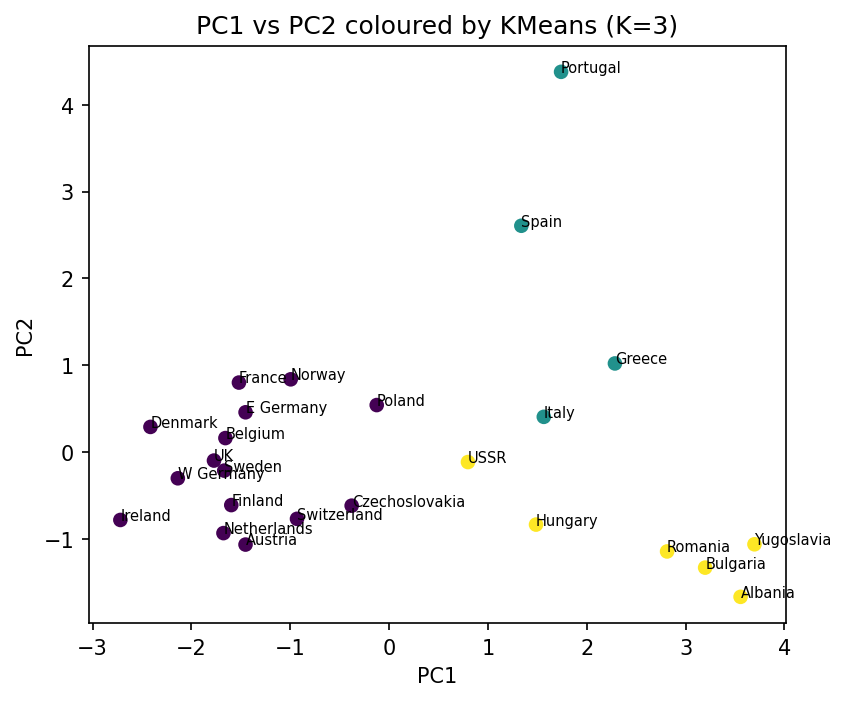

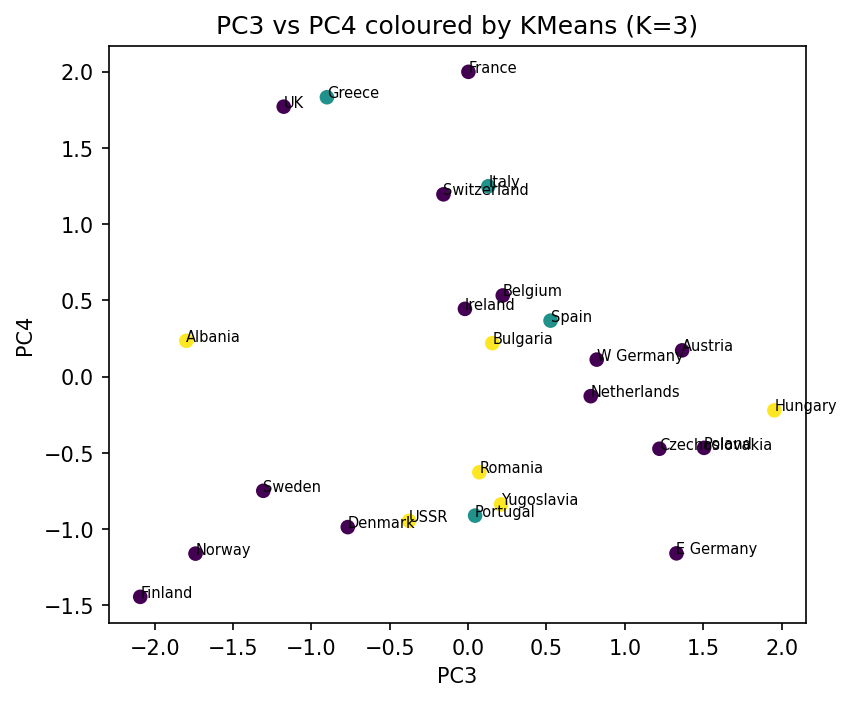

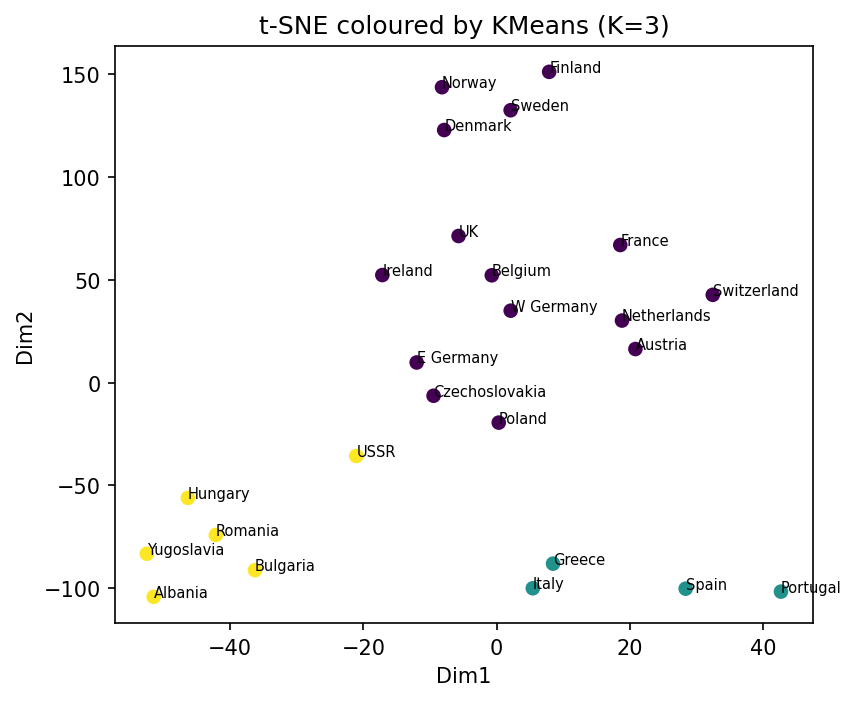

In [38]:
# --- K=3 clustering on the feature matrix ---
from sklearn.cluster import KMeans

# 1) Fit KMeans on standardized features
kmeans3 = KMeans(n_clusters=3, n_init=50, random_state=123)
kmeans3.fit(food_scaled)
labels3 = kmeans3.labels_

# 2) Ensure we have PC scores (food_v)
#    (You already computed pcfood via PCA() earlier)
food_v = pd.DataFrame(pcfood.transform(food_scaled), index=food.index)
food_v.columns = [f"PC{i+1}" for i in range(food_v.shape[1])]
food_v["cluster3"] = labels3

# 3) Quick summary tables: cluster sizes and PC means
sizes = food_v["cluster3"].value_counts().sort_index()
pc_means = food_v.groupby("cluster3")[["PC1","PC2","PC3","PC4"]].mean().round(2)

print("Cluster sizes (K=3):")
print(sizes)
print("\nCluster means in PC space (first 4 PCs):")
print(pc_means)

# 4) Optional: characterise clusters in original variables (z-scores)
orig_means = pd.DataFrame(food_scaled, index=food.index, columns=food.columns)
orig_means["cluster3"] = labels3
cluster_profiles = orig_means.groupby("cluster3").mean().sort_index().round(2)  # z-score means
print("\nCluster profiles (mean z-scores by food type):")
display(cluster_profiles)

# 5) Visualise in PC space (two separate charts, no explicit colors)
import matplotlib.pyplot as plt

# PC1 vs PC2
plt.figure(figsize=(6,5), dpi=150)
plt.scatter(food_v["PC1"], food_v["PC2"], c=labels3)
for i, country in enumerate(food_v.index):
    plt.text(food_v["PC1"].iloc[i], food_v["PC2"].iloc[i], country, fontsize=7)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("PC1 vs PC2 coloured by KMeans (K=3)")
plt.show()

# PC3 vs PC4
plt.figure(figsize=(6,5), dpi=150)
plt.scatter(food_v["PC3"], food_v["PC4"], c=labels3)
for i, country in enumerate(food_v.index):
    plt.text(food_v["PC3"].iloc[i], food_v["PC4"].iloc[i], country, fontsize=7)
plt.xlabel("PC3"); plt.ylabel("PC4")
plt.title("PC3 vs PC4 coloured by KMeans (K=3)")
plt.show()

# 6) Link to your previous t-SNE (same settings as earlier cells)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', perplexity=5, random_state=123)
X_tsne = tsne.fit_transform(food_scaled)
X_tsne = pd.DataFrame(X_tsne, columns=['Dim1','Dim2'], index=food.index)

plt.figure(figsize=(6,5), dpi=150)
plt.scatter(X_tsne["Dim1"], X_tsne["Dim2"], c=labels3)
for i, country in enumerate(X_tsne.index):
    plt.text(X_tsne["Dim1"].iloc[i], X_tsne["Dim2"].iloc[i], country, fontsize=7)
plt.xlabel("Dim1"); plt.ylabel("Dim2")
plt.title("t-SNE coloured by KMeans (K=3)")
plt.show()


In [39]:
pc_means = (food_v.assign(cluster3=labels3)
            .groupby("cluster3")[["PC1","PC2","PC3","PC4"]]
            .mean().round(2))
pc_means

,PC1,PC2,PC3,PC4
cluster3,,,,
0,-1.50,-0.15,-0.00,-0.02
1,1.73,2.10,-0.05,0.63
2,2.59,-1.02,0.04,-0.36
